In [ ]:
import kagglehub
jamiewelsh2_ball_by_ball_it20_path = kagglehub.dataset_download('jamiewelsh2/ball-by-ball-it20')
bhuvaneshprasad_all_t20_internationals_dataset_2005_to_2023_path = kagglehub.dataset_download('bhuvaneshprasad/all-t20-internationals-dataset-2005-to-2023')

print('Data source import complete.')


Using Colab cache for faster access to the 'ball-by-ball-it20' dataset.
Using Colab cache for faster access to the 'all-t20-internationals-dataset-2005-to-2023' dataset.
Data source import complete.


# **Cricketer's Performance Analysis in T20I**

---
## Introduction

---
## Task/Goal

Analyze a cricketer’s performance in T20I by using Cricket statistics

---
## Problem Type

**Classification**: Specialized cricketer (e.g.: Hard hitter batter, Economical bowler)

# Libraries

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import missingno as msno

In [ ]:
Ball_by_Ball_Data = pd.read_csv(f'{jamiewelsh2_ball_by_ball_it20_path}/ball_by_ball_it20.csv')
Player_Info_Data = pd.read_csv(f'{bhuvaneshprasad_all_t20_internationals_dataset_2005_to_2023_path}/players_info.csv')
Batting_Data = pd.read_csv(f'{bhuvaneshprasad_all_t20_internationals_dataset_2005_to_2023_path}/t20i_Batting_Card.csv')
Bowling_Data = pd.read_csv(f'{bhuvaneshprasad_all_t20_internationals_dataset_2005_to_2023_path}/t20i_Bowling_Card.csv')
Fow_Data = pd.read_csv(f'{bhuvaneshprasad_all_t20_internationals_dataset_2005_to_2023_path}/t20i_Fow_Card.csv')
Matches_Data = pd.read_csv(f'{bhuvaneshprasad_all_t20_internationals_dataset_2005_to_2023_path}/t20i_Matches_Data.csv')
Patnership_Data = pd.read_csv(f'{bhuvaneshprasad_all_t20_internationals_dataset_2005_to_2023_path}/t20i_Partnership_Card.csv')

In [ ]:
# Not neccessary
Ball_by_Ball_Data.columns

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [ ]:
Ball_by_Ball_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               425119 non-null  int64  
 1   Match ID                 425119 non-null  int64  
 2   Date                     425119 non-null  object 
 3   Venue                    425119 non-null  object 
 4   Bat First                425119 non-null  object 
 5   Bat Second               425119 non-null  object 
 6   Innings                  425119 non-null  int64  
 7   Over                     425119 non-null  int64  
 8   Ball                     425119 non-null  int64  
 9   Batter                   425119 non-null  object 
 10  Non Striker              425119 non-null  object 
 11  Bowler                   425119 non-null  object 
 12  Batter Runs              425119 non-null  int64  
 13  Extra Runs               425119 non-null  int64  
 14  Runs

In [ ]:
print("Ball by Ball Data:")
print(Ball_by_Ball_Data.head())
print(Ball_by_Ball_Data.tail())

Ball by Ball Data:
   Unnamed: 0  Match ID        Date            Venue    Bat First  \
0           0   1339605  2023-03-26  SuperSport Park  West Indies   
1           1   1339605  2023-03-26  SuperSport Park  West Indies   
2           2   1339605  2023-03-26  SuperSport Park  West Indies   
3           3   1339605  2023-03-26  SuperSport Park  West Indies   
4           4   1339605  2023-03-26  SuperSport Park  West Indies   

     Bat Second  Innings  Over  Ball     Batter  ...        Winner  \
0  South Africa        1     1     1    BA King  ...  South Africa   
1  South Africa        1     1     2  KR Mayers  ...  South Africa   
2  South Africa        1     1     3    BA King  ...  South Africa   
3  South Africa        1     1     4  J Charles  ...  South Africa   
4  South Africa        1     1     5  J Charles  ...  South Africa   

  Chased Successfully  Total Batter Runs  Total Non Striker Runs  \
0                   1                  1                       0   
1        

# Testing the Display Function

In [ ]:
# Head for Ball by Ball Data
display("Ball by Ball Data Head" ,Ball_by_Ball_Data.head())

'Ball by Ball Data Head'

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [ ]:
# Head for Player Info Data
display("Player Info Data Head" ,Player_Info_Data.head())
#display(Player_Info_Data.tail()

'Player Info Data Head'

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata
0,93957,1046619,Avinash Pai,1982-01-24,NaN,M,right-hand bat,right-arm offbreak,18.0,NaN,NaN
1,2182,51462,Sherwin Campbell,1970-11-01,NaN,M,right-hand bat,right-arm medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 326616, 'url': '/db/PICTURES/CMS/326600..."
2,48391,56194,Tamim Iqbal,1989-03-20,NaN,M,left-hand bat,NaN,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303166, 'url': '/db/PICTURES/CMS/303100..."
3,2198,55935,Javed Omar,1976-11-25,NaN,M,right-hand bat,legbreak,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302990, 'url': '/db/PICTURES/CMS/302900..."
4,52290,298438,Jason Roy,1990-07-21,NaN,M,right-hand bat,NaN,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303963, 'url': '/db/PICTURES/CMS/303900..."


In [ ]:
print("Player Info. Data:")
print(Player_Info_Data.head())
print(Player_Info_Data.tail())

print("Batting Data:")
print(Batting_Data.head())
print(Batting_Data.tail())

print("Bowling Data:")
print(Bowling_Data.head())
print(Bowling_Data.tail())

print("Fow Data:")
print(Fow_Data.head())
print(Fow_Data.tail())

print("Matches Data:")
print(Matches_Data.head())
print(Matches_Data.tail())

print("Patnership Data:")
print(Patnership_Data.head())
print(Patnership_Data.tail())

Player Info. Data:
   player_id  player_object_id       player_name         dob  dod gender  \
0      93957           1046619       Avinash Pai  1982-01-24  NaN      M   
1       2182             51462  Sherwin Campbell  1970-11-01  NaN      M   
2      48391             56194       Tamim Iqbal  1989-03-20  NaN      M   
3       2198             55935        Javed Omar  1976-11-25  NaN      M   
4      52290            298438         Jason Roy  1990-07-21  NaN      M   

    batting_style       bowling_style  country_id  \
0  right-hand bat  right-arm offbreak        18.0   
1  right-hand bat    right-arm medium         4.0   
2   left-hand bat                 NaN        25.0   
3  right-hand bat            legbreak        25.0   
4  right-hand bat                 NaN         1.0   

                                           image_url  \
0                                                NaN   
1  https://img1.hscicdn.com/image/upload/f_auto,t...   
2  https://img1.hscicdn.com/image/upl

In [ ]:
# Allrounder
Allrounders_Data = pd.concat([Player_Info_Data, Batting_Data, Bowling_Data])
print(Allrounders_Data)

       player_id  player_object_id       player_name         dob  dod gender  \
0        93957.0         1046619.0       Avinash Pai  1982-01-24  NaN      M   
1         2182.0           51462.0  Sherwin Campbell  1970-11-01  NaN      M   
2        48391.0           56194.0       Tamim Iqbal  1989-03-20  NaN      M   
3         2198.0           55935.0        Javed Omar  1976-11-25  NaN      M   
4        52290.0          298438.0         Jason Roy  1990-07-21  NaN      M   
...          ...               ...               ...         ...  ...    ...   
30643        NaN               NaN               NaN         NaN  NaN    NaN   
30644        NaN               NaN               NaN         NaN  NaN    NaN   
30645        NaN               NaN               NaN         NaN  NaN    NaN   
30646        NaN               NaN               NaN         NaN  NaN    NaN   
30647        NaN               NaN               NaN         NaN  NaN    NaN   

        batting_style       bowling_sty

In [ ]:
print(Allrounders_Data.columns)

Index(['player_id', 'player_object_id', 'player_name', 'dob', 'dod', 'gender',
       'batting_style', 'bowling_style', 'country_id', 'image_url',
       'image_metadata', 'Match ID', 'innings', 'team', 'batsman', 'runs',
       'balls', 'fours', 'sixes', 'strikeRate', 'isOut', 'wicketType',
       'fielders', 'bowler', 'opposition', 'bowler id', 'overs', 'maidens',
       'conceded', 'wickets', 'economy', 'dots', 'wides', 'noballs'],
      dtype='object')


In [ ]:
#Show all column names of Ball By Ball Dataset
print(Ball_by_Ball_Data.columns)

Index(['Unnamed: 0', 'Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second',
       'Innings', 'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Innings Runs',
       'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')


In [ ]:
# Overall about cricketer
Player_Info_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6701 entries, 0 to 6700
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_id         6701 non-null   int64  
 1   player_object_id  6701 non-null   int64  
 2   player_name       6701 non-null   object 
 3   dob               6674 non-null   object 
 4   dod               1258 non-null   object 
 5   gender            6701 non-null   object 
 6   batting_style     6608 non-null   object 
 7   bowling_style     5547 non-null   object 
 8   country_id        6699 non-null   float64
 9   image_url         3753 non-null   object 
 10  image_metadata    3753 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 576.0+ KB


In [ ]:
# Count rows and coulums
row = len(Fow_Data.axes[0])
column = len(Fow_Data.axes[1])
print("Number of Rows: ", row)
print("Number of Columns: ", column)

Number of Rows:  33093
Number of Columns:  7


# **Visualization**

<Axes: >

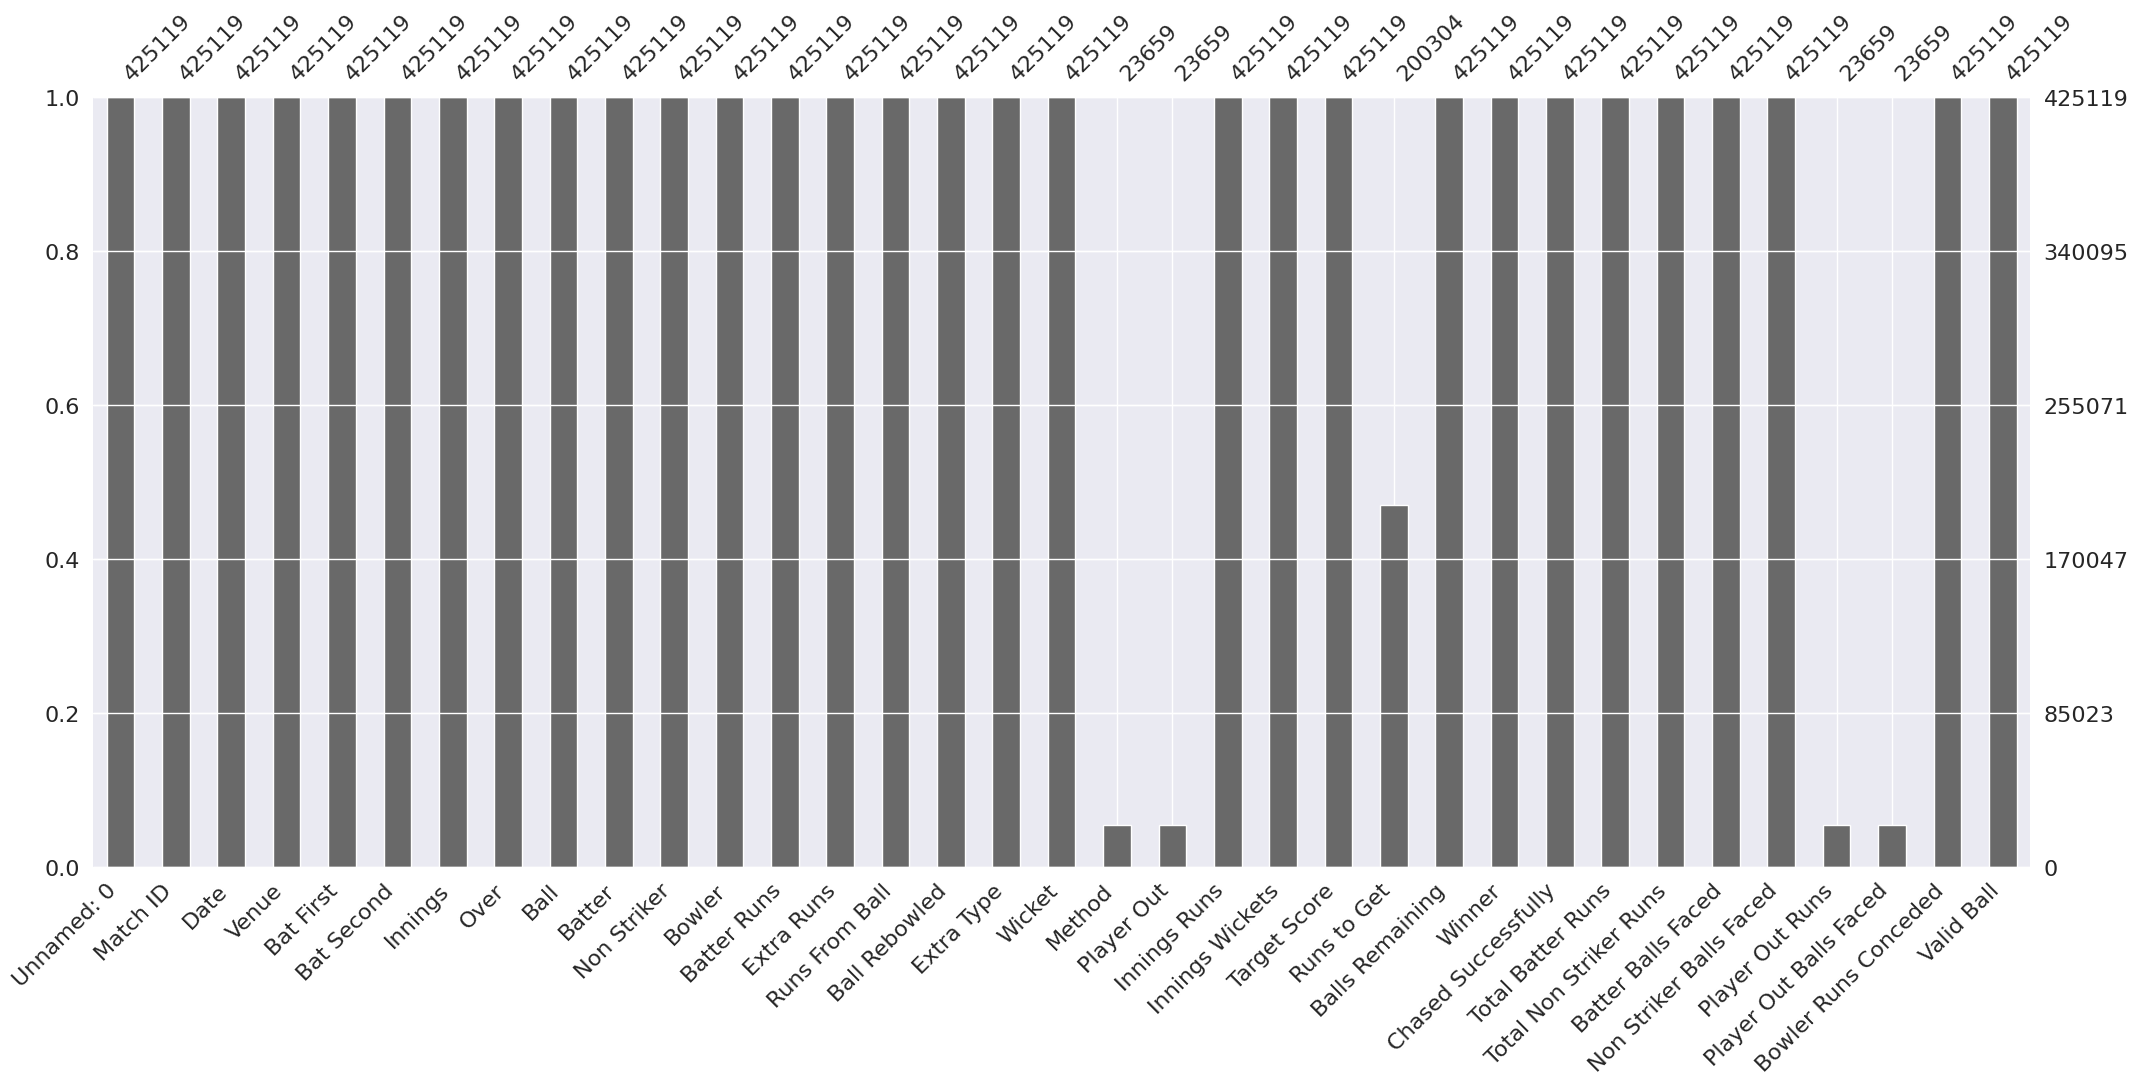

In [ ]:
msno.bar(Ball_by_Ball_Data)

<Axes: >

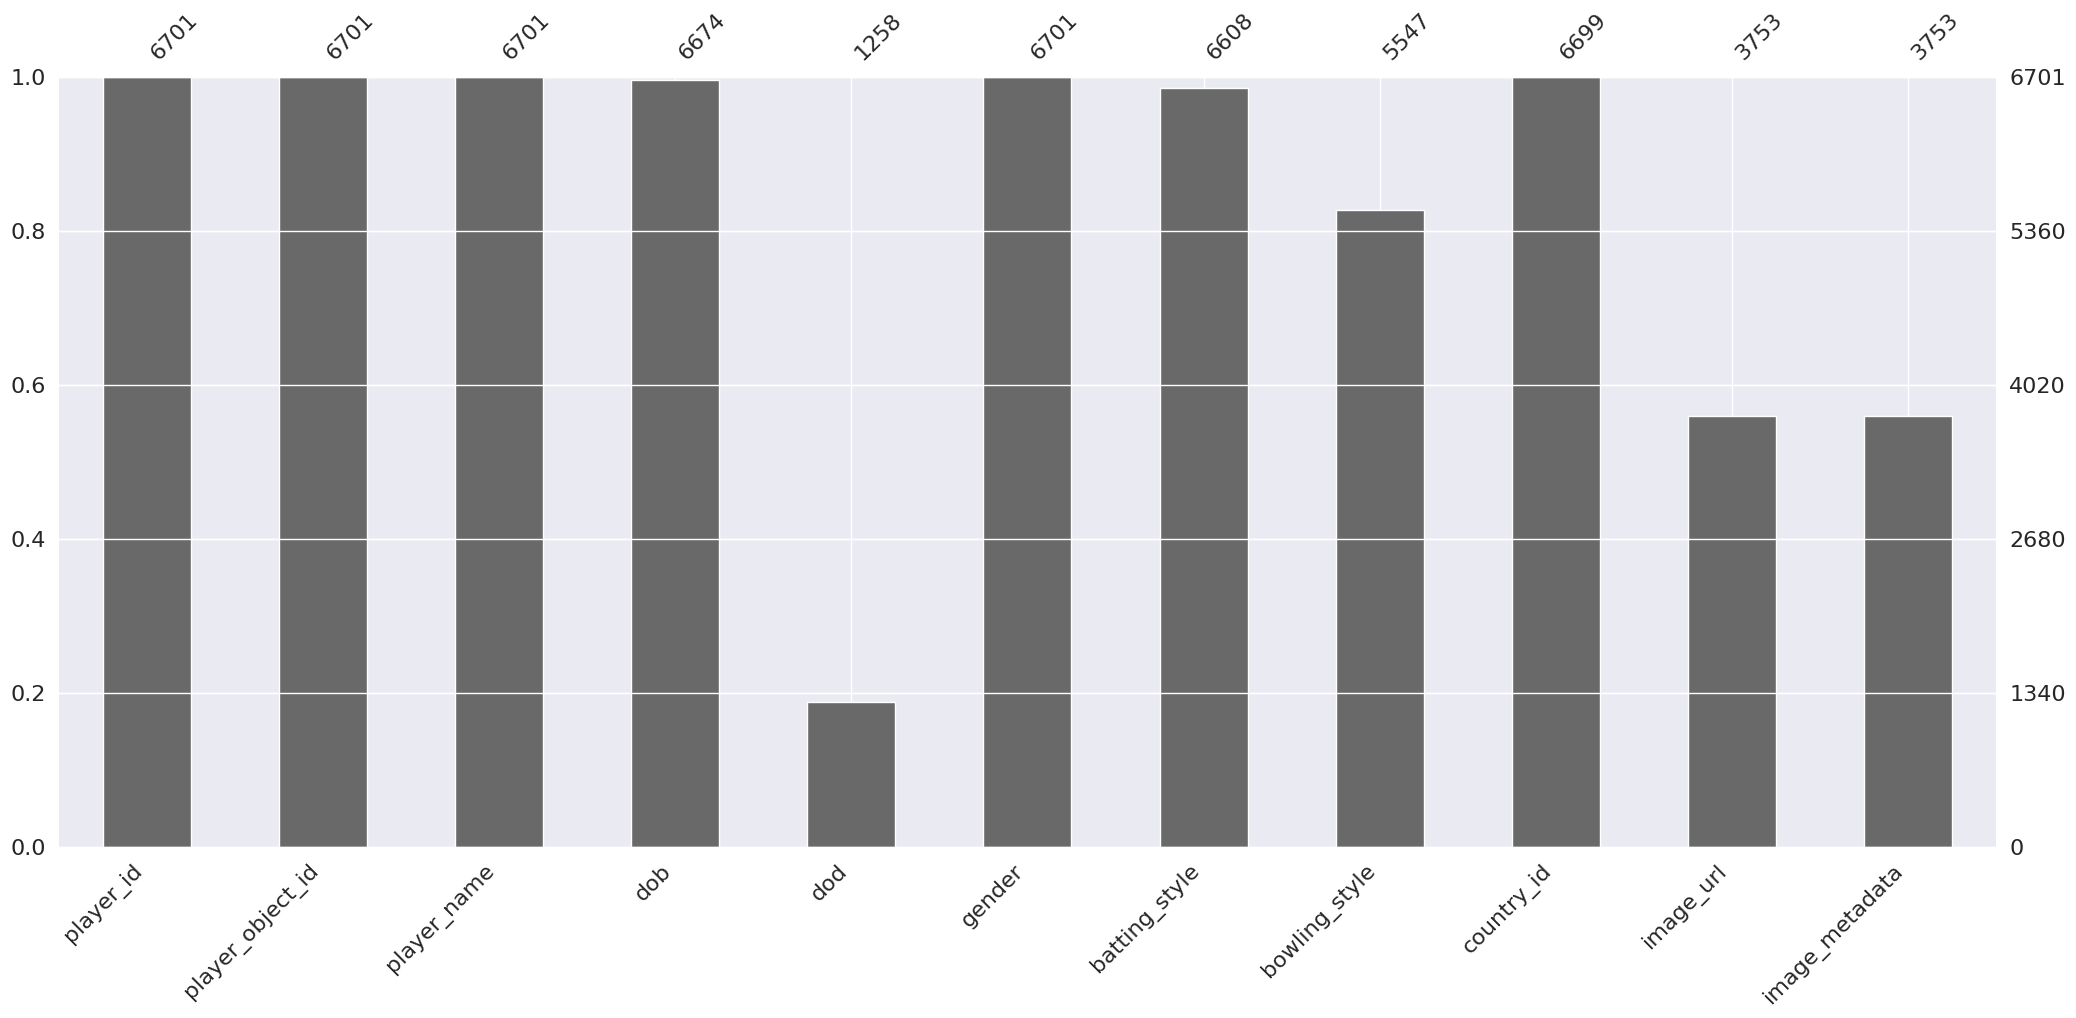

In [ ]:
msno.bar(Player_Info_Data)

<Axes: >

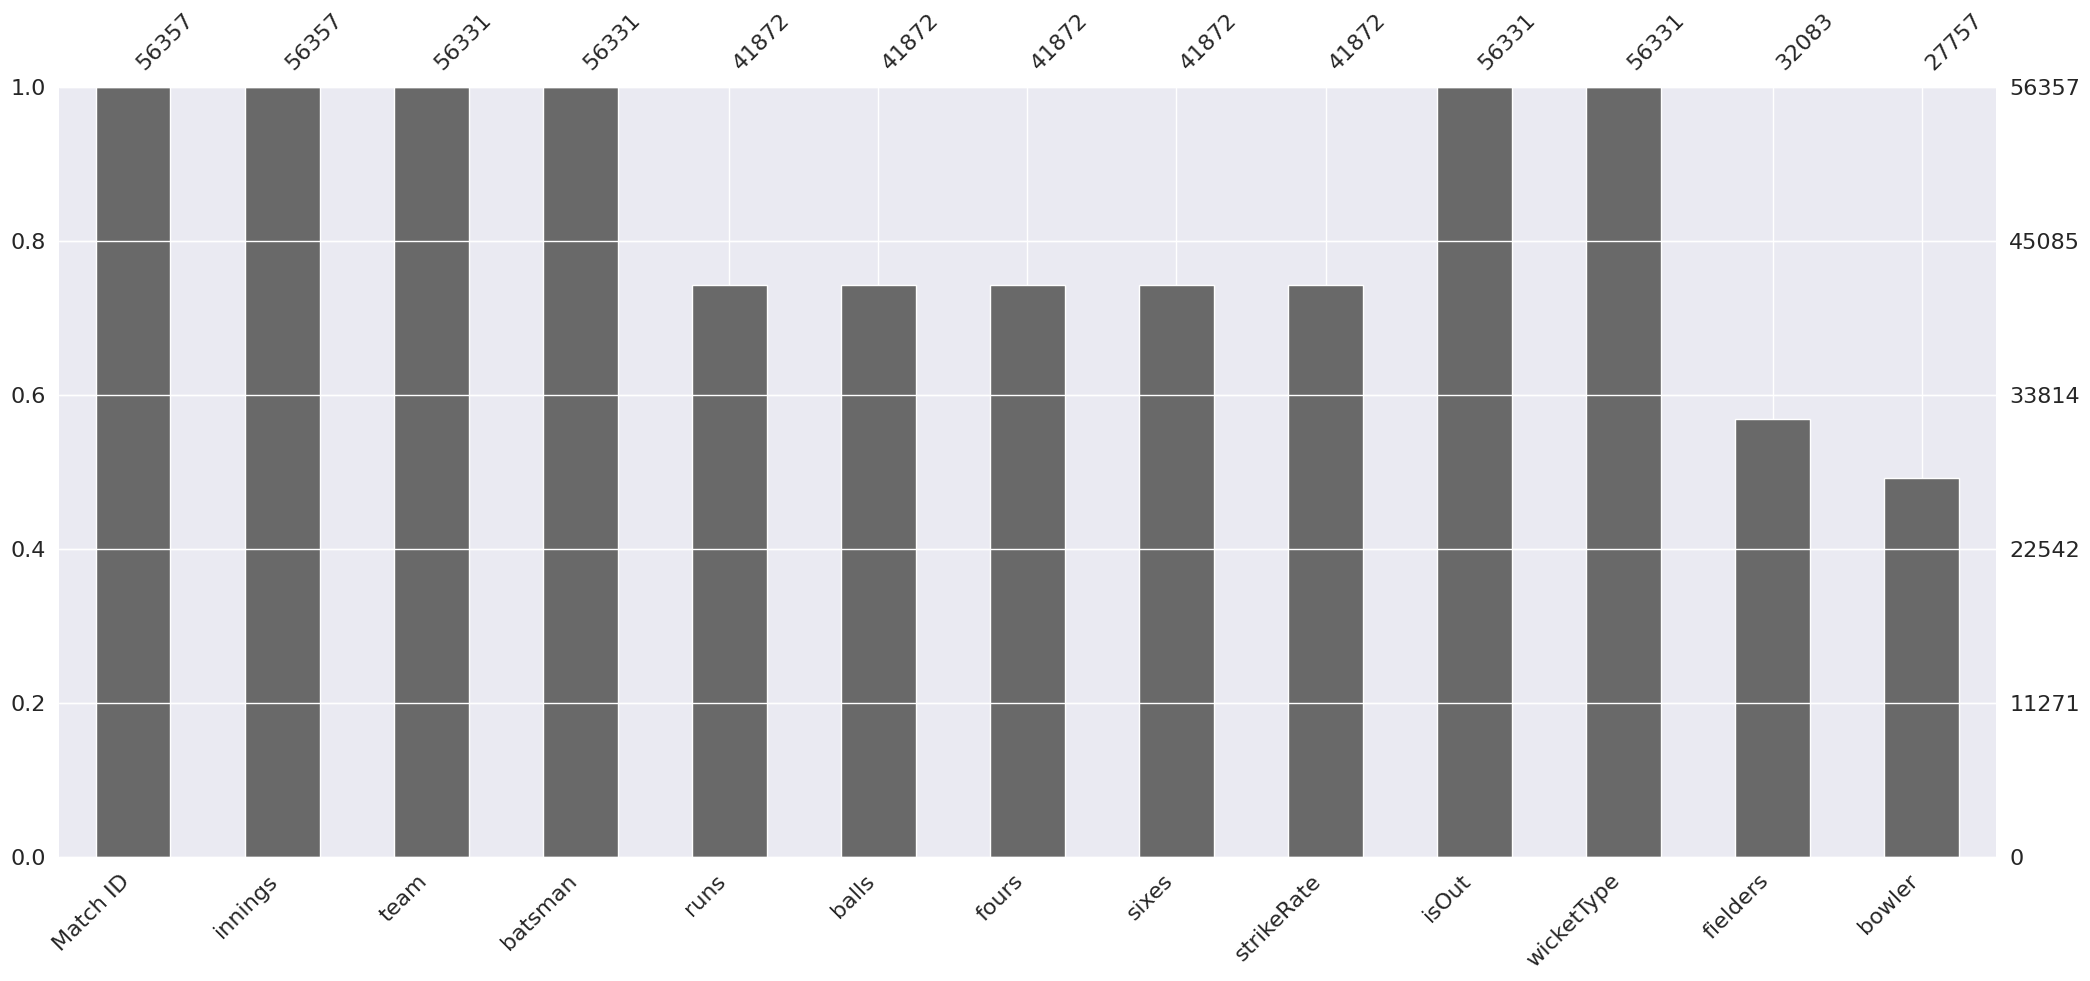

In [ ]:
msno.bar(Batting_Data)

<Axes: >

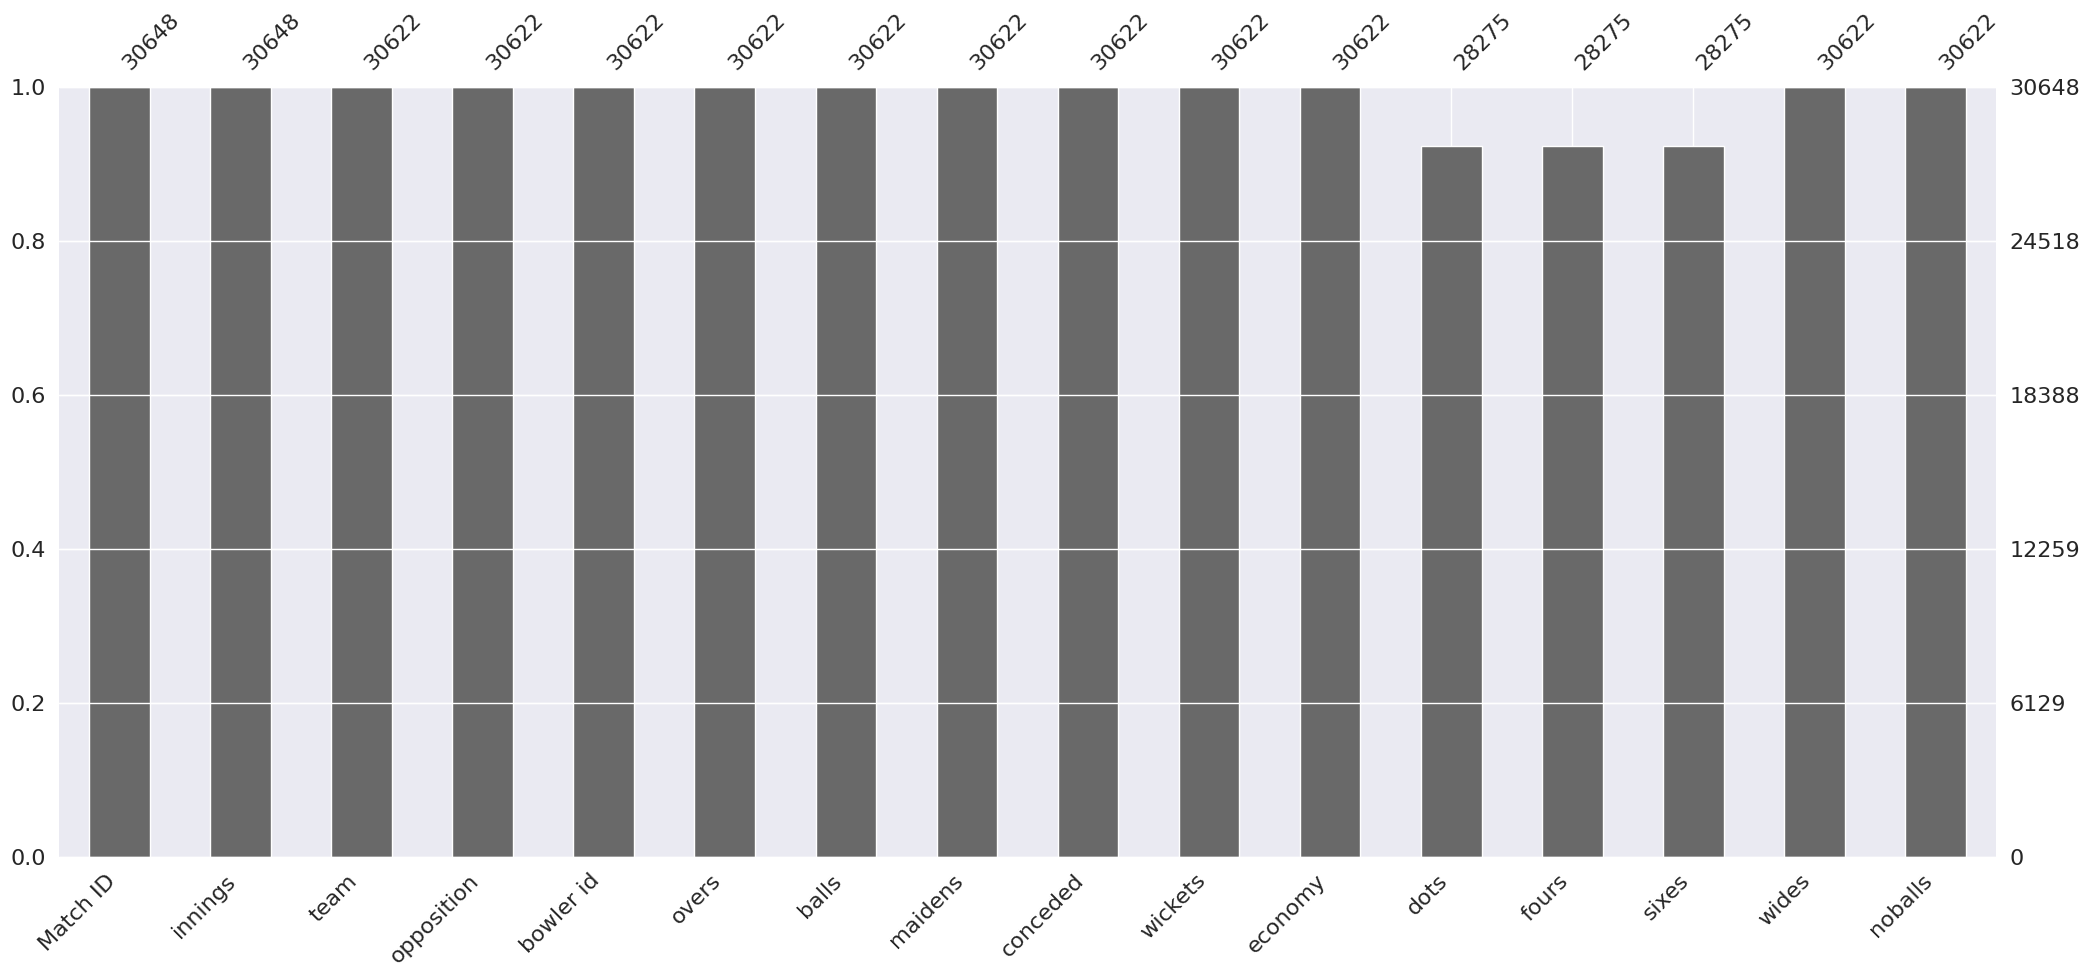

In [ ]:
msno.bar(Bowling_Data)

<Axes: >

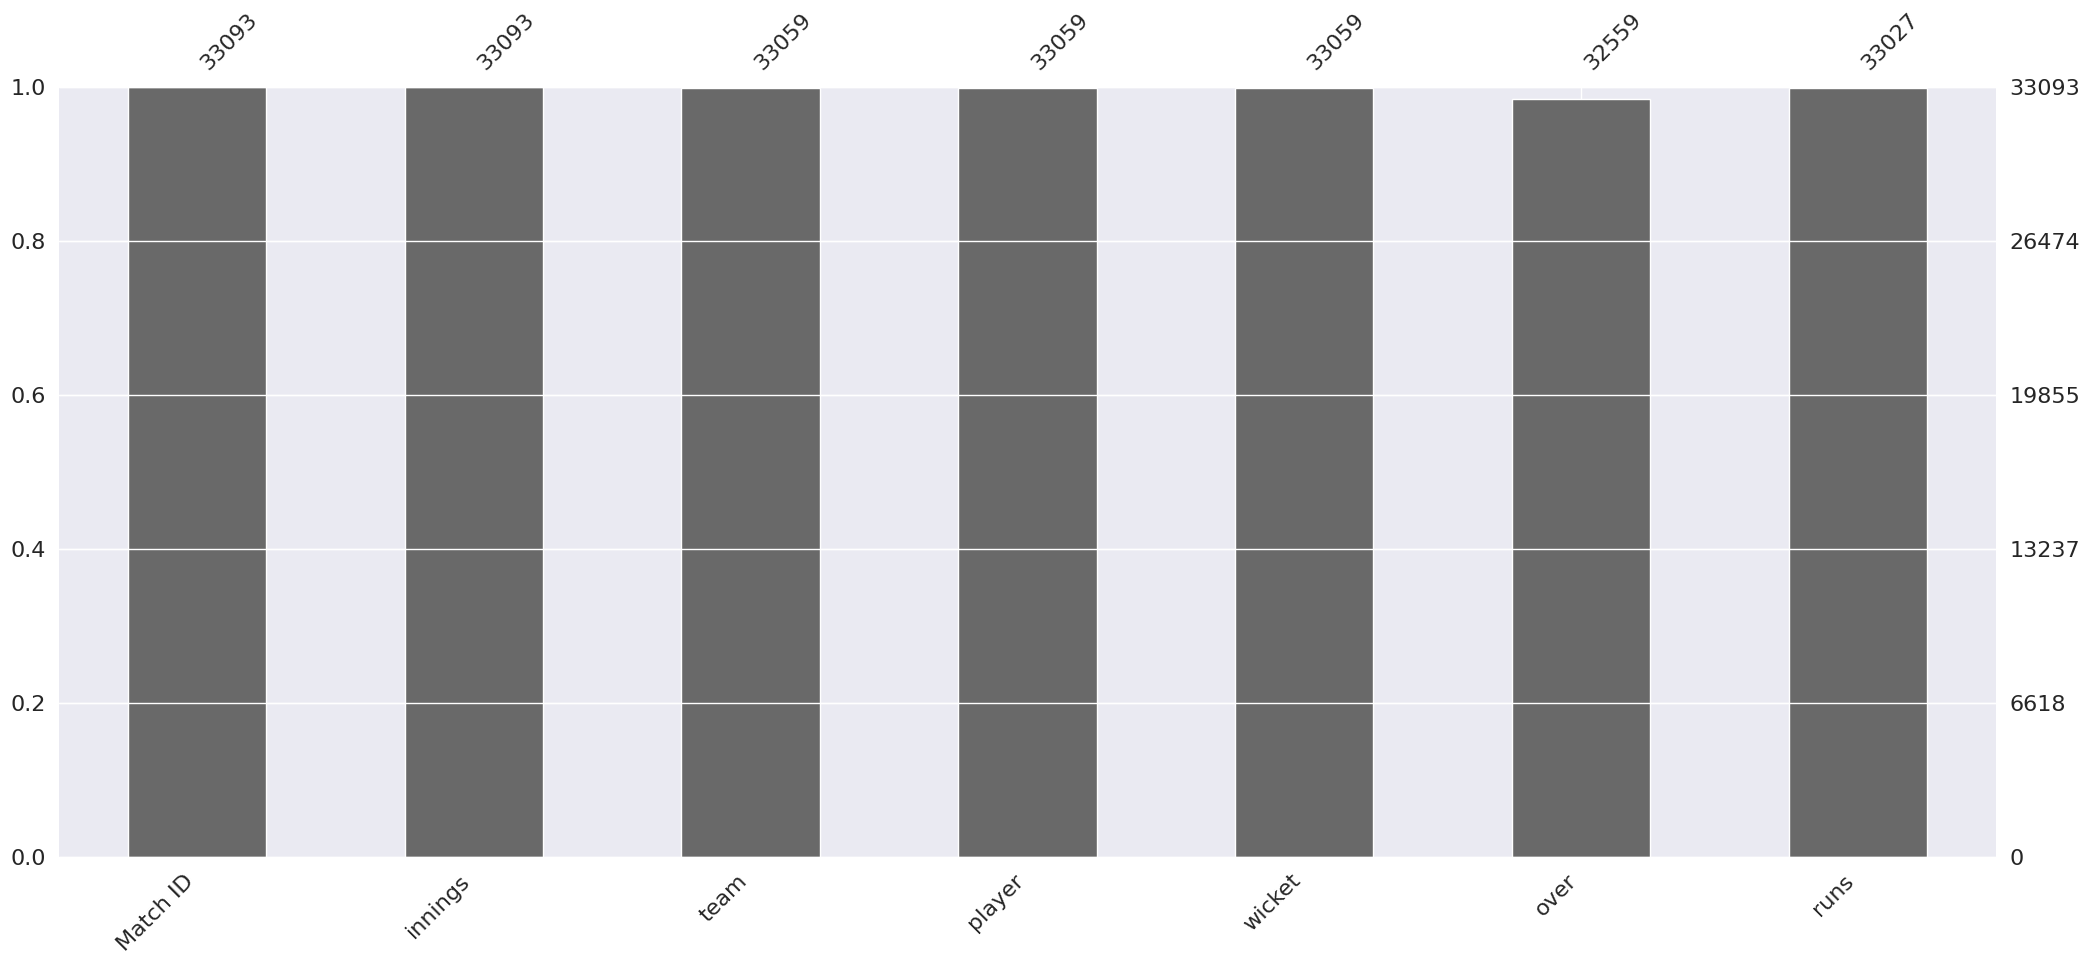

In [ ]:
msno.bar(Fow_Data)

<Axes: >

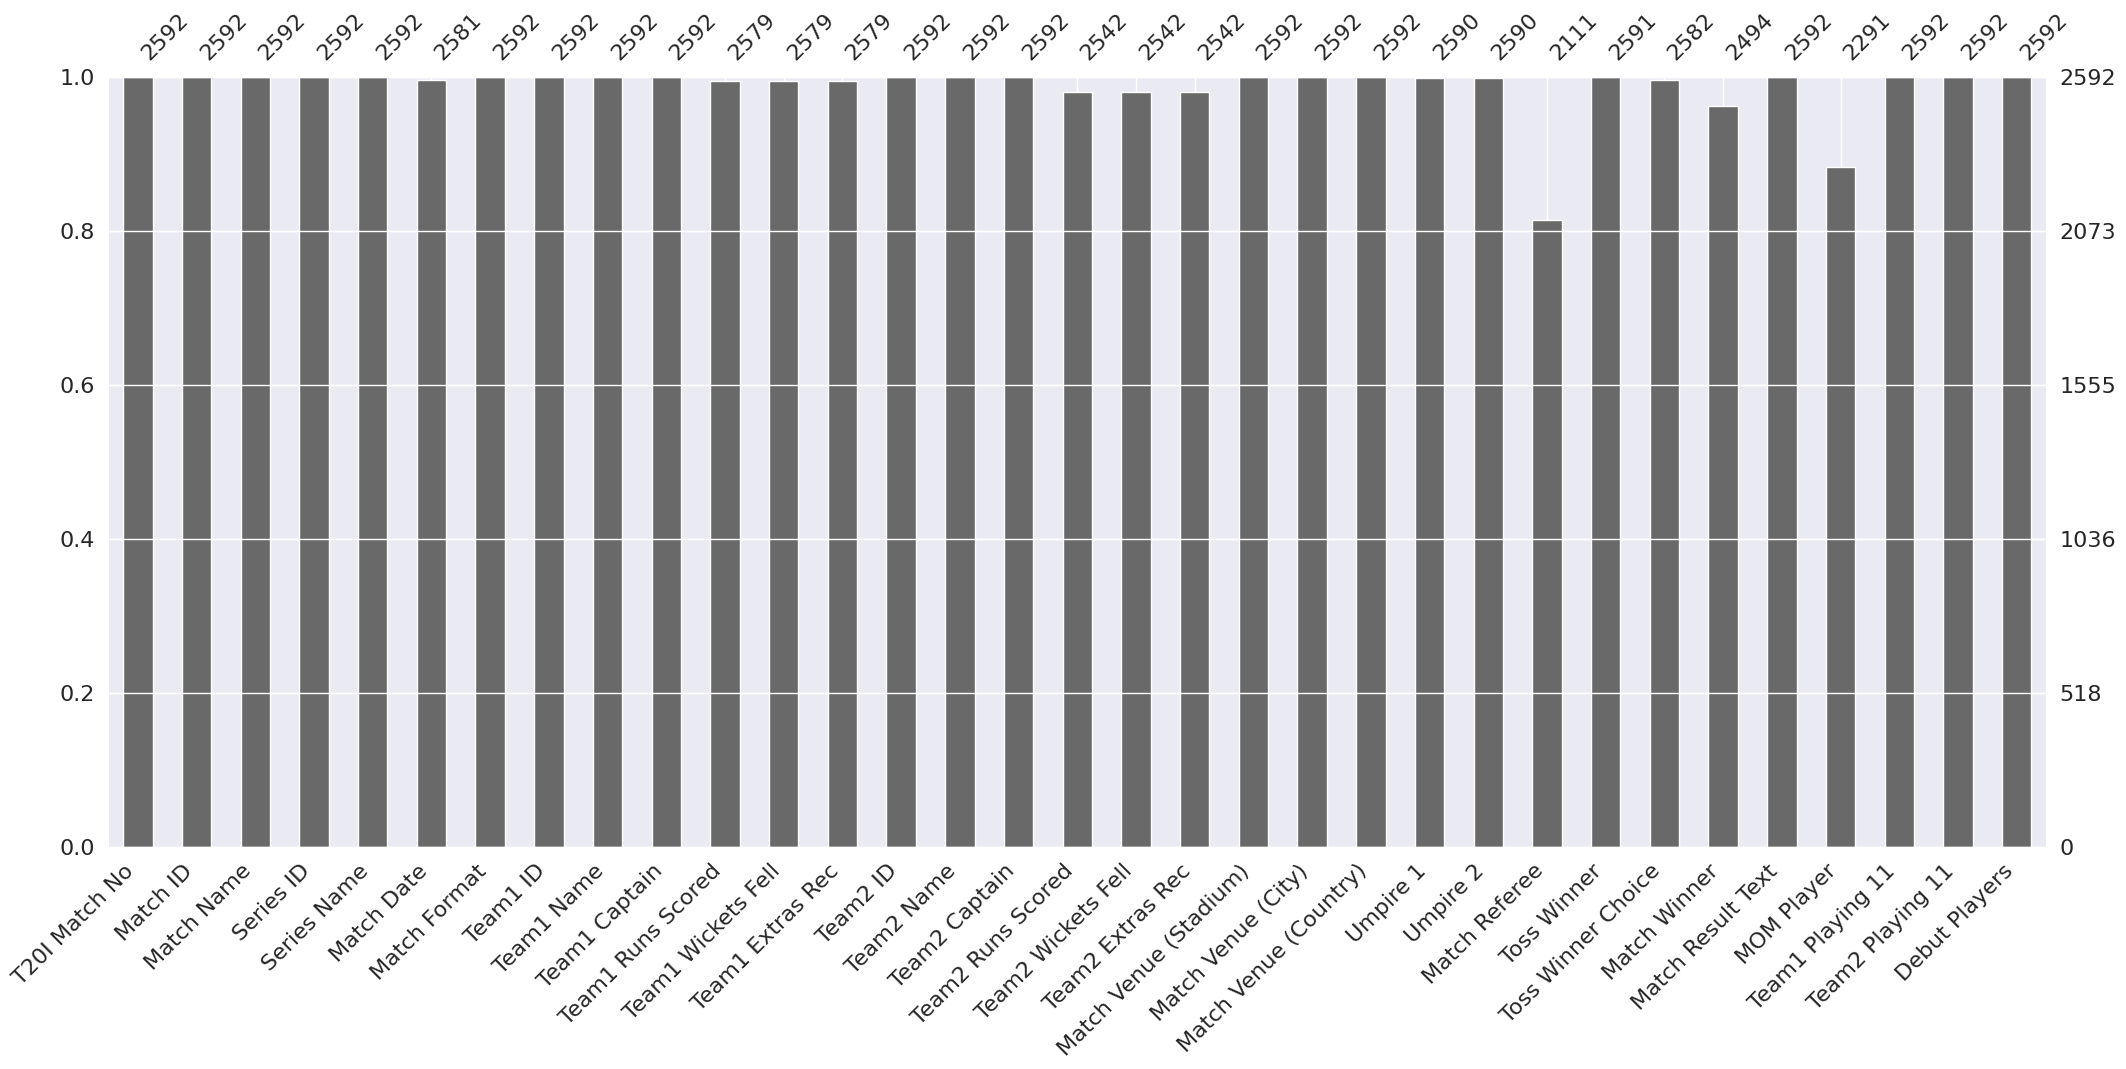

In [ ]:
msno.bar(Matches_Data)

<Axes: >

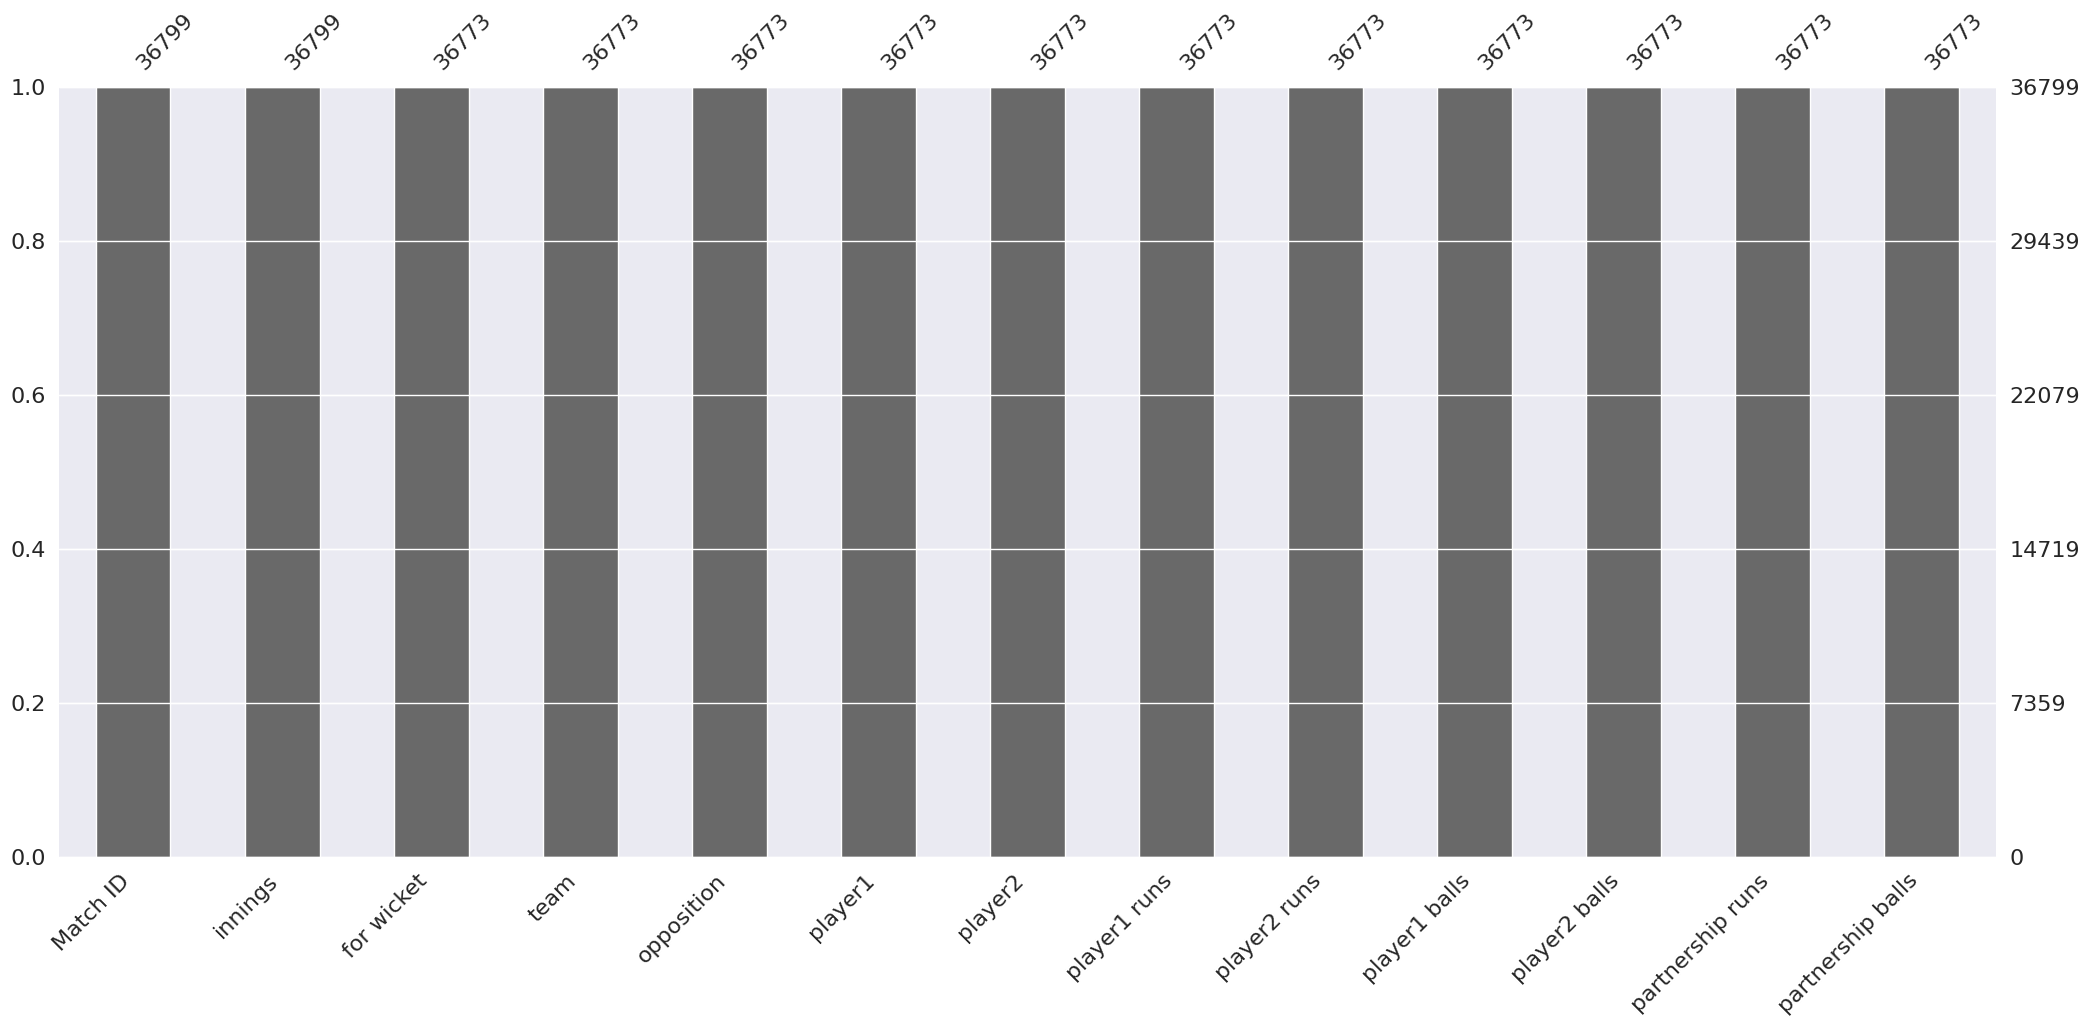

In [ ]:
msno.bar(Patnership_Data)

# **Plotting**